<a href="https://colab.research.google.com/github/renzasprec/Credit-Card-Customer-Churn/blob/wip/Credit_Card_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# import helper libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(f'Version of Numpy: {np.__version__}')
print(f'Version of Pandas: {pd.__version__}')
print(f'Version of Seaborn: {sns.__version__}')

Version of Numpy: 1.26.4
Version of Pandas: 2.2.2
Version of Seaborn: 0.13.2


# Background

A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out the reason behind this and leverage the same to predict customers who are likely to drop off.

# Data Pre-Processing

## Loading Data

In [99]:
# import data downloader
try:
  import kagglehub
except ImportError:
  !pip install kagglehub
  import kagglehub
print(f'Version of Kagglehub: {kagglehub.__version__}')

Version of Kagglehub: 0.3.6


In [100]:
file_path = kagglehub.dataset_download('sakshigoyal7/credit-card-customers', path='BankChurners.csv')

In [101]:
data = pd.read_csv(file_path)

## Data Dictionary



* **CLIENTNUM** - Client number. Unique identifier for the customer holding the
account
* **Attrition Flag** - Internal event (customer activity) variable - if the account is closed then 1 else 0
* **Customer_Age** - Demographic variable - Customer's Age in Years
* **Gender** - Demographic variable - M=Male, F=Female
* **Dependent_count** - Demographic variable - Number of dependents
* **Education_Level** - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
* **Marital_Status** - Demographic variable - Married, Single, Divorced, Unknown
* **Income_Category** - Demographic variable - Annual Income Category of the account holder (< \$40K, \$40K - 60K, \$60K - \$80K, \$80K-\$120K, >
* **Card_Category** - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
* **Months_on_book** - Period of relationship with bank
* **Total_Relationship_Count** - Total no. of products held by the customer
* **Months_Inactive_12_mon** - No. of months inactive in the last 12 months
* **Contacts_Count_12_mon** - No. of Contacts in the last 12 months
* **Credit_Limit** - Credit Limit on the Credit Card
* **Total_Revolving_Bal** - Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy** - Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1** - Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt** - Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct** - Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1** - Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio** - Average Card Utilization Ratio


## Data Inspection

Inspect the shape of the data

In [102]:
print(f'Data shape: {data.shape}')

Data shape: (10127, 23)


Check the head of the data.

In [103]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Remove the last two columns.

In [104]:
data = data.iloc[:,:-2]

For this dataset, the target vaiable is `Attrition_Flag` column.

In [105]:
target = data.columns[1]
print(f'Target variable: {target}')

Target variable: Attrition_Flag


In [106]:
data[target].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

The target variable is categorical with two possible outcomes 'Existing Customer', or 'Attrited Customer'

Inspect column names

In [107]:
data.columns.to_list()

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

Inspect the data types of each column.


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Check if the column name matches its corresponding data type - `int64` or `float64` for numerical data, and `object` for categorical data.

Inspect the number of unique values of each columns.

In [109]:
data.nunique()

,0
CLIENTNUM,10127
Attrition_Flag,2
Customer_Age,45
Gender,2
Dependent_count,6
Education_Level,7
Marital_Status,4
Income_Category,6
Card_Category,4
Months_on_book,44


The `CLIENTNUM` columns is just a unique identifier for each client and contains no useful information.

In [110]:
data = data.drop('CLIENTNUM', axis=1)

Check data for missing entries.

In [111]:
print(f'Total number of rows with missing entries: {data.isna().any().sum()}')

Total number of rows with missing entries: 0


Retrieve the columns names for numerical, and for categorical features.

In [112]:
# retrieve numerical features
numerical_features = data.drop(target, axis=1).select_dtypes(include=['int64', 'float64']).columns
print(f'Numerical features: \n{numerical_features}')

Numerical features: 
Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [113]:
# retrieve categorical features
categorical_features = data.drop(target, axis=1).select_dtypes(include=['object']).columns
print(f'Categorical features: \n{categorical_features}')

Categorical features: 
Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


Inspect summary statistics of the data set.

In [114]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


No feature seems to have an outlier.

Separate the data into `X` (input features), and `y` (target variable).

In [115]:
y = data.pop(target).map({'Existing Customer':0, 'Attrited Customer':1})
X = data

# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Target Feature

Perform univariate analysis of the target feature.

In [116]:
# set theme for plotting
sns.set_theme()

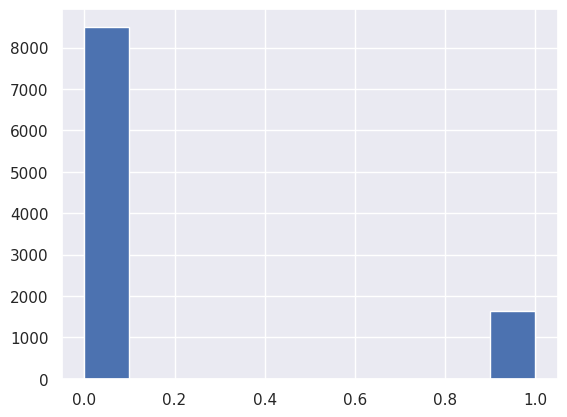

In [117]:
y.hist()
plt.show()

The histogram of the target feature shows that there is an imbalanced with positive class `Attrited Customer`. This should be taken into account to avoid bias towards the majority class, in this case, `Existing Customer`.

In [118]:
class_ratio = (y==1).astype(int).sum()/ (y==0).astype(int).sum()
print(f'Ratio of the postive class to the negative class: {class_ratio:.2f}')

Ratio of the postive class to the negative class: 0.19


Perform univariate analysis of each feature.

### Numerical Features

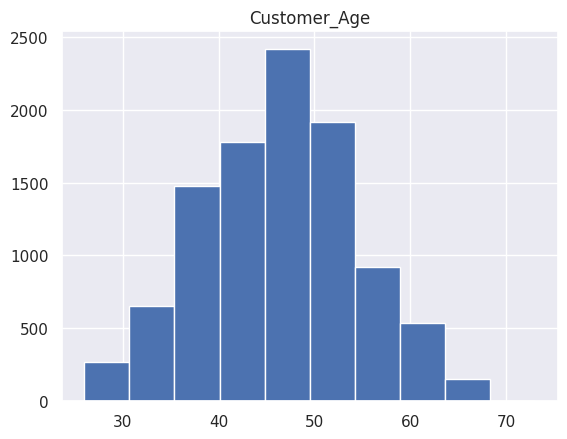

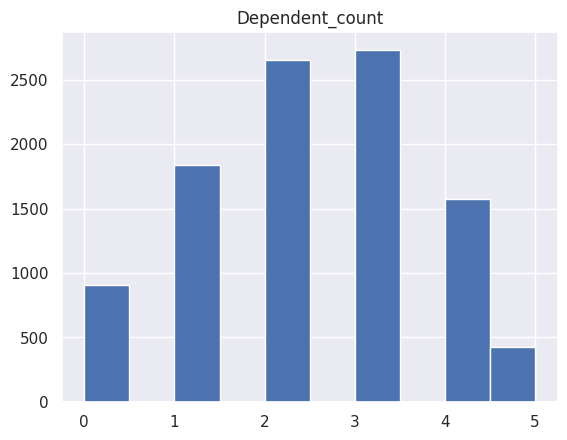

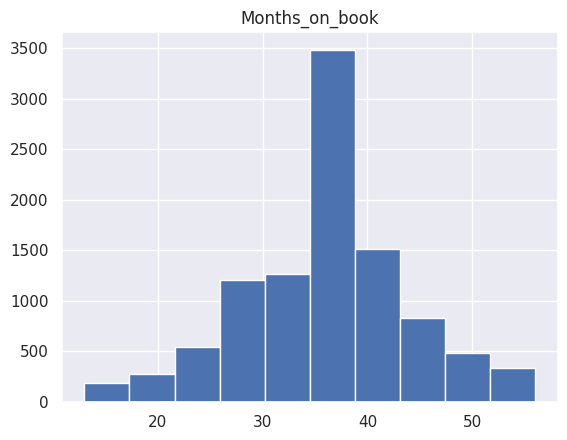

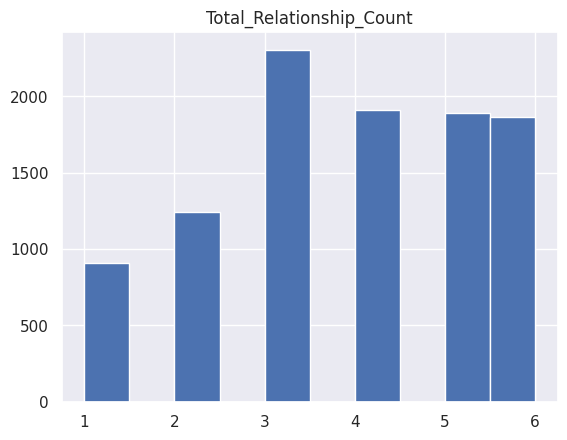

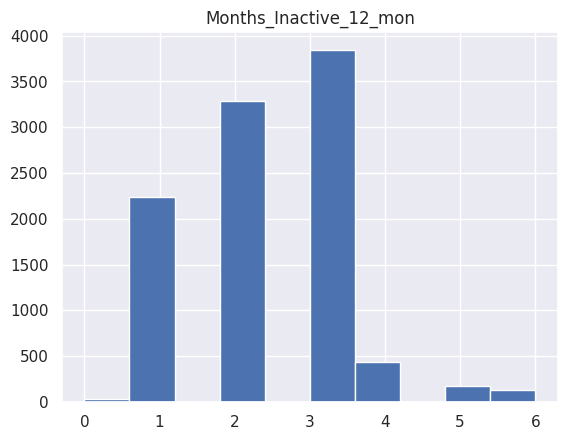

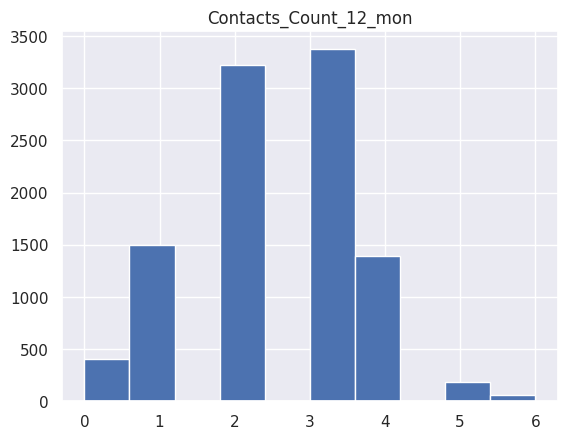

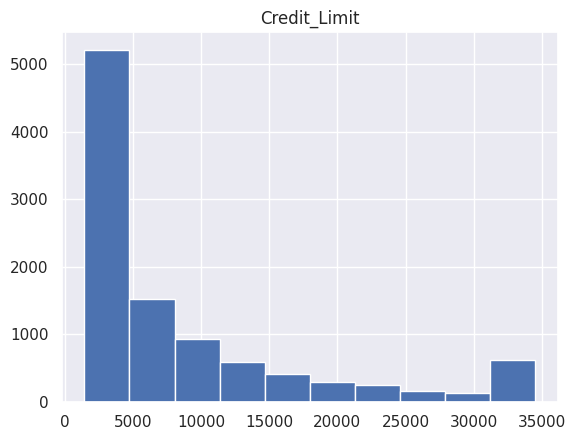

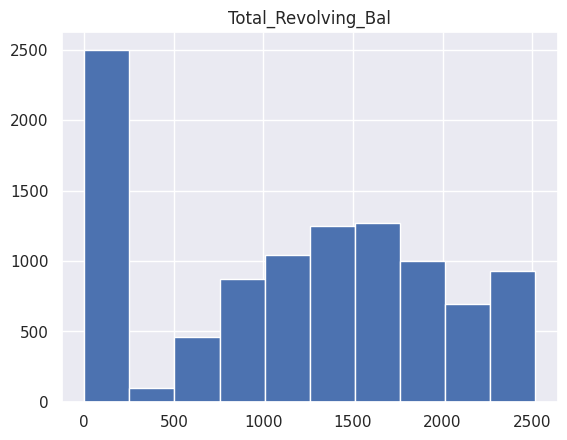

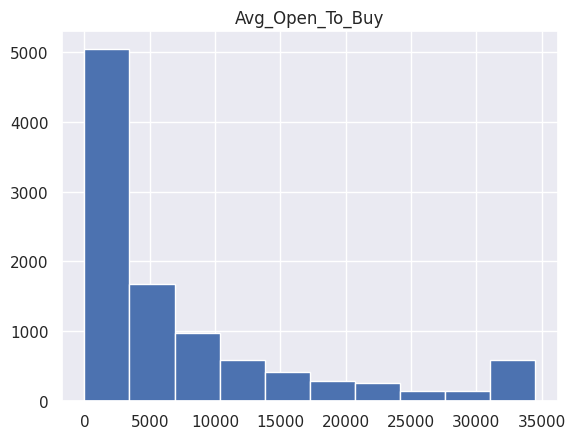

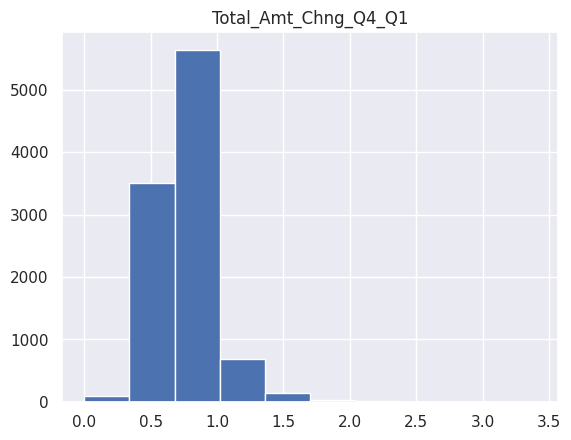

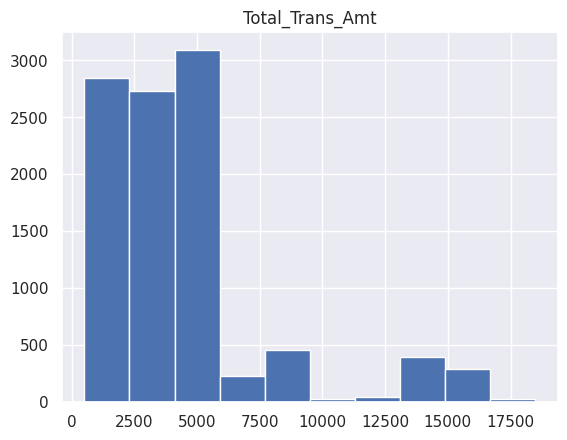

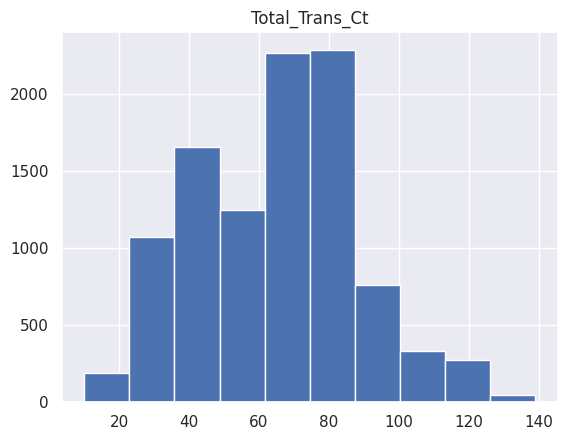

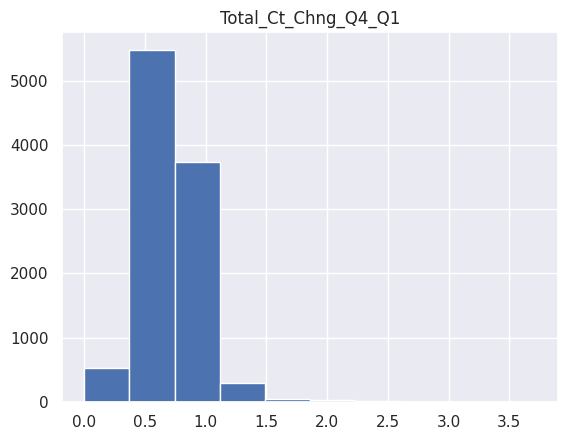

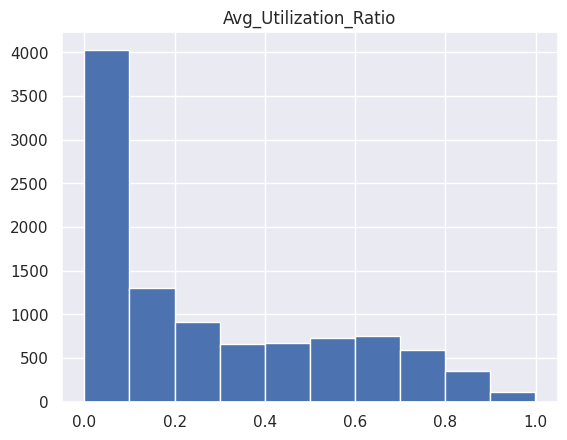

In [119]:
for feature in numerical_features: # iterate through each numerical feature
  X[feature].hist()
  plt.title(feature)
  plt.show()

### Categorical Features

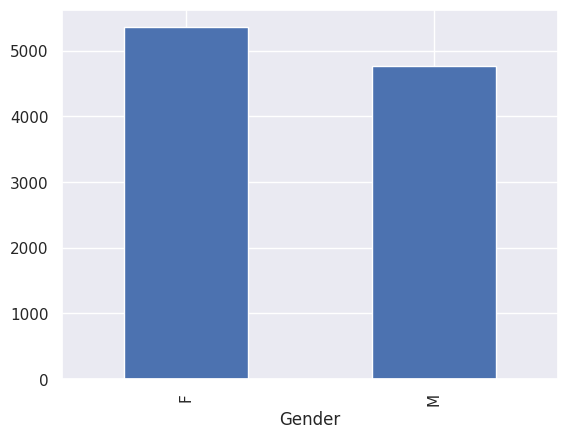

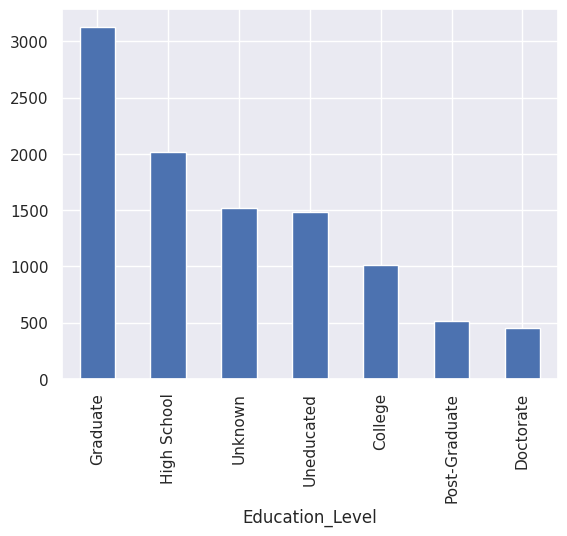

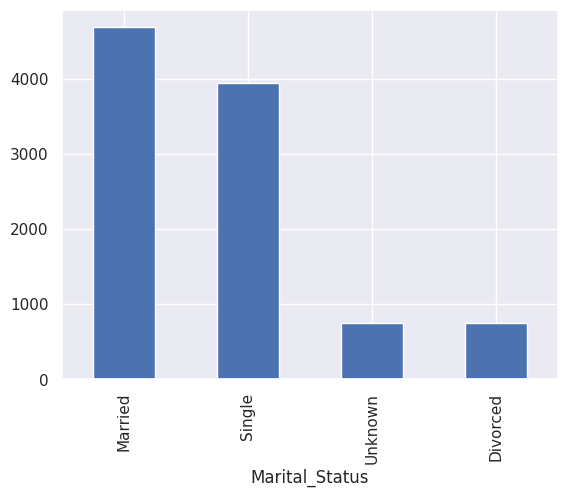

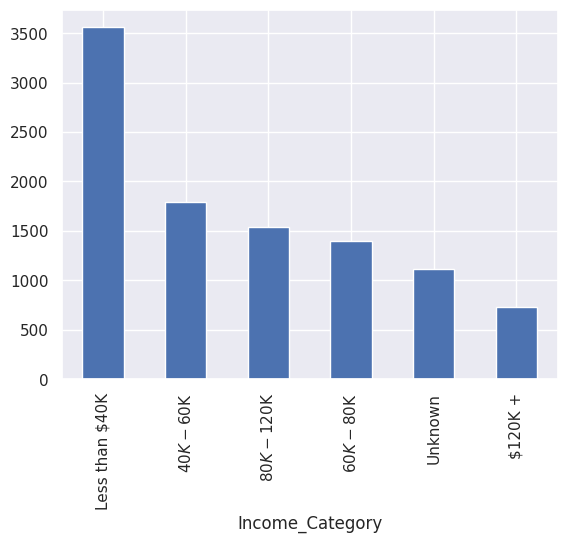

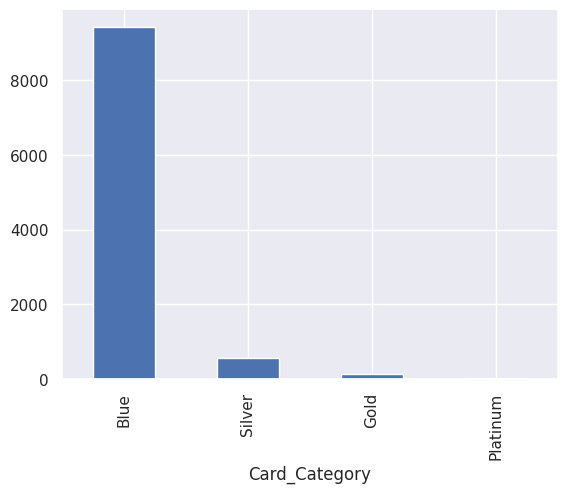

In [120]:
for feature in categorical_features: #iterate through each categorical feature
  X[feature].value_counts().plot.bar()
  plt.show()

## Data Splitting

Split the data into 70% train, 15% validation, and 15% test sets.

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
# split the data into train and a combination of validation and test
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=1) # use shuffle to shuffle before making the split, and stratify to maintain the ratio of the classes

In [123]:
# further split the data into validation and test
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, train_size=0.5, stratify=y_validation_test, random_state=1)

# Feature Engineering

## One-Hot Encoding

In [124]:
# install a specific version of sklearn
!pip install scikit-learn==1.5.2

# print version of sklearn
!pip show scikit-learn | grep Version

# import from sklearn library
from sklearn.preprocessing import StandardScaler

Version: 1.5.2


Perform One-Hot encoding on the categorical features.

In [125]:
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_validation_enc = pd.get_dummies(X_validation, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

In [126]:
X_train_enc.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
4124,50,1,43,6,1,2,7985.0,0,7985.0,1.032,...,False,False,False,False,False,False,True,False,False,False
4686,50,0,36,3,3,2,5444.0,2499,2945.0,0.468,...,False,False,False,True,False,False,False,False,False,False
1276,26,0,13,6,3,4,1643.0,1101,542.0,0.713,...,True,False,True,False,False,False,False,False,False,False
6119,65,0,55,3,3,0,2022.0,0,2022.0,0.579,...,True,False,False,False,False,True,False,False,False,False
2253,46,3,35,6,3,4,4930.0,0,4930.0,1.019,...,True,False,False,False,True,False,False,False,False,False


## Feature Scaling

Perform standard scaling on the numerical features.

In [127]:
# create an instance of the StandardScaler
ss = StandardScaler()
# fit on the data
X_train_enc[numerical_features] = ss.fit_transform(X_train_enc[numerical_features]) # perform standard scaling on numerical features
X_train_preprocessed = X_train_enc

For both the validation and test sets, use the fitted scaler to avoid data leakage.

In [128]:
X_validation_enc[numerical_features] = ss.transform(X_validation_enc[numerical_features])
X_validation_preprocessed = X_validation_enc
X_test_enc[numerical_features] = ss.transform(X_test_enc[numerical_features])
X_test_preprocessed = X_test_enc

In [129]:
X_train_preprocessed.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
4124,0.459404,-1.031509,0.881465,1.399822,-1.323267,-0.415722,-0.065661,-1.424369,0.062961,1.251655,...,False,False,False,False,False,False,True,False,False,False
4686,0.459404,-1.797897,0.007958,-0.527516,0.650703,-0.415722,-0.347487,1.642980,-0.495286,-1.332156,...,False,False,False,True,False,False,False,False,False,False
1276,-2.531648,-1.797897,-2.862139,1.399822,0.650703,1.397035,-0.769062,-0.072968,-0.761450,-0.209756,...,True,False,True,False,False,False,False,False,False,False
6119,2.328812,-1.797897,2.378907,-0.527516,0.650703,-2.228479,-0.727027,-1.424369,-0.597520,-0.823640,...,True,False,False,False,False,True,False,False,False,False
2253,-0.039104,0.501266,-0.116829,1.399822,0.650703,1.397035,-0.404496,-1.424369,-0.275421,1.192099,...,True,False,False,False,True,False,False,False,False,False


Inspect the new shape of the pre-processed data.

In [130]:
print(f'Shape of pre-processed data: {X_train_preprocessed.shape}')

Shape of pre-processed data: (7088, 32)


# Model Fitting

## Model Selection

Fit several models on the training data and select the best peforming model.

Models to fit: Logistic, SVM, Random Forest, Gradient Boosting, Adaptive Boosting, XGBoost, CatBoost

In [131]:
# import from the necessary packages
from sklearn.linear_model import LogisticRegressionCV # logistic regression
from sklearn.svm import SVC # support vector machine
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier # random forest, gradient boosting, and adaptive boosting
print ('Sklearn: ')
!pip show scikit-learn | grep Version
try:
  from catboost import CatBoostClassifier # CatBoost
except ImportError:
  !pip install CatBoost
  from catboost import CatBoostClassifier # CatBoost
print ('CatBoost: ')
!pip show CatBoost | grep Version
from xgboost import XGBClassifier # XGBoost
print ('XGBoost: ')
!pip show xgboost | grep Version

Sklearn: 
Version: 1.5.2
CatBoost: 
Version: 1.2.7
License: Apache License, Version 2.0
XGBoost: 
Version: 2.1.3


In [139]:
models = {
    'logistic' : LogisticRegressionCV(random_state=1, class_weight='balanced'),
    'SVM' : SVC(random_state=1, class_weight='balanced'),
    'random forest' : RandomForestClassifier(random_state=1, class_weight='balanced'),
    'gradient boosting' : HistGradientBoostingClassifier(random_state=1, class_weight='balanced'),
    'adaptive boosting' : AdaBoostClassifier(random_state=1),
    'xgboost' : XGBClassifier(random_state=1, scale_pos_weight=class_ratio),
    'catboost' : CatBoostClassifier(random_state=1, auto_class_weights='Balanced', verbose=0)
}

In this problem, we would be using **F1-score** to evaluate the models. With **F1-score**, we are balancing recall and precision. In other words, we are balancing customers who will not churn when they actually will (false negatives), and customers who will churn when they actually won't (false positives). In cases where the cost of missing churning customers outweighs the cost of retention actions, we could use **F1-beta** with **beta** values favoring recall.

In [140]:
from sklearn.metrics import f1_score

In [141]:
model_evaluation = {
    'model' : [],
    'f1-scores' : [],
}
for (model_name, model) in models.items():
  y_pred = model.fit(X_train_preprocessed, y_train).predict(X_validation_preprocessed)
  f1score = f1_score(y_validation, y_pred)
  model_evaluation['model'].append(model_name)
  model_evaluation['f1-scores'].append(f1score)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [149]:
model_evaluation = (pd.DataFrame(model_evaluation))
display(model_evaluation)

,model,f1-scores
0,logistic,0.630137
1,SVM,0.779720
2,random forest,0.805556
3,gradient boosting,0.929293
4,adaptive boosting,0.874477
5,xgboost,0.896552
6,catboost,0.920000


In [154]:
best_model = model_evaluation['model'].iloc[model_evaluation['f1-scores'].argmax()]
print(f'Best performing model: {best_model}')

Best performing model: gradient boosting


The best performing model is the gradient boosting model.

## Hyperparameter Tuning

In this section, we will tune the hyperparameters of the best model obtained from the model selection.

In [ ]:
# create an instance of the HistGradientBoostingClassifier
clf = HistGradientBoostingClassifer(random_state=1)